# Differential gene expression analysis

In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(DESeq2)
#library(DiffBind)
library(tidyr)
#library(wesanderson)
library(viridis)
library(gplots)
library(pheatmap)
library(data.table)
library(EnhancedVolcano)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter,

In [31]:
setwd('/lustre1/project/stg_00041/Irene/bulkRNAseq_primed_naive_PRC2i_2020/featureCount/')

In [32]:
gene_counts <- read.delim("gene_raw_counts_ordered.txt")

In [33]:
head(gene_counts)

GeneID,primed_rep1,primed_rep2,primed_rep3,primed_PRC2i_rep1,primed_PRC2i_rep2,primed_PRC2i_rep3,naive_rep1,naive_rep2,naive_rep3,naive_PRC2i_rep1,naive_PRC2i_rep2,naive_PRC2i_rep3
DDX11L1,1,0,0,0,0,0,0,0,0,0,0,0
WASH7P,0,0,1,2,1,0,0,1,1,0,1,0
MIR6859-1,0,0,0,0,0,0,0,0,0,0,0,0
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
myvars_primed <- c("GeneID","primed_rep1","primed_rep2","primed_rep3", "primed_PRC2i_rep1","primed_PRC2i_rep2","primed_PRC2i_rep3")

In [35]:
gene_counts_primed <- gene_counts[myvars_primed]

In [36]:
head(gene_counts_primed)

GeneID,primed_rep1,primed_rep2,primed_rep3,primed_PRC2i_rep1,primed_PRC2i_rep2,primed_PRC2i_rep3
DDX11L1,1,0,0,0,0,0
WASH7P,0,0,1,2,1,0
MIR6859-1,0,0,0,0,0,0
MIR1302-2HG,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0


In [37]:
rownames(gene_counts_primed) <- gene_counts_primed[,1]

In [38]:
gene_counts_primed$GeneID <- NULL

In [39]:
head(gene_counts_primed)

,primed_rep1,primed_rep2,primed_rep3,primed_PRC2i_rep1,primed_PRC2i_rep2,primed_PRC2i_rep3
DDX11L1,1,0,0,0,0,0
WASH7P,0,0,1,2,1,0
MIR6859-1,0,0,0,0,0,0
MIR1302-2HG,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0


In [40]:
condition <- factor(c("primed","primed","primed","primed_PRC2i","primed_PRC2i","primed_PRC2i"),levels = c("primed_PRC2i", "primed"))
print(condition)

[1] primed       primed       primed       primed_PRC2i primed_PRC2i
[6] primed_PRC2i
Levels: primed_PRC2i primed


In [41]:
colData <- data.frame(sampleName = colnames(gene_counts_primed),
                      condition = condition)

In [42]:
colData

sampleName,condition
primed_rep1,primed
primed_rep2,primed
primed_rep3,primed
primed_PRC2i_rep1,primed_PRC2i
primed_PRC2i_rep2,primed_PRC2i
primed_PRC2i_rep3,primed_PRC2i


In [51]:
dds_unbiased <- DESeqDataSetFromMatrix(countData = gene_counts_primed, 
                                       colData = colData, 
                                       design = ~ condition)

colnames(dds_unbiased) <- colnames(gene_counts_primed)

In [52]:
dds_unbiased

class: DESeqDataSet 
dim: 59050 6 
metadata(1): version
assays(1): counts
rownames(59050): DDX11L1 WASH7P ... MT-TT MT-TP
rowData names(0):
colnames(6): primed_rep1 primed_rep2 ... primed_PRC2i_rep2
  primed_PRC2i_rep3
colData names(2): sampleName condition

only keep rows that at least 2 conditions have >1 counts

In [53]:
dds_unbiased <- dds_unbiased[ rowSums(counts(dds_unbiased)>1) >=2, ]

In [54]:
dds_unbiased

class: DESeqDataSet 
dim: 26675 6 
metadata(1): version
assays(1): counts
rownames(26675): CICP27 AL627309.6 ... MT-TT MT-TP
rowData names(0):
colnames(6): primed_rep1 primed_rep2 ... primed_PRC2i_rep2
  primed_PRC2i_rep3
colData names(2): sampleName condition

In [55]:
dds_unbiased$condition

[1] primed       primed       primed       primed_PRC2i primed_PRC2i
[6] primed_PRC2i
Levels: primed_PRC2i primed

In [56]:
dds <- DESeq(dds_unbiased, betaPrior=FALSE)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [57]:
res_deseq <- results(dds)

In [58]:
res_deseq <- res_deseq[order(res_deseq$log2FoldChange),]

In [59]:
res_deseq$padj <- p.adjust(res_deseq$pvalue, method="BH")

In [60]:
head(res_deseq)

log2 fold change (MLE): condition primed vs primed PRC2i 
Wald test p-value: condition primed vs primed PRC2i 
DataFrame with 6 rows and 6 columns
                   baseMean    log2FoldChange             lfcSE
                  <numeric>         <numeric>         <numeric>
CFHR1      36.7921458817158 -5.38683129418141 0.787723179953888
AC093702.1 3.30503377890931 -5.10968613643361  1.59545135003724
AC098798.1 3.24538090607556 -5.08766787879032  1.61249001242144
AC005165.1 2.98475376352222 -4.95150317685121  1.67771952425919
GABRA4     2.74049536765319 -4.84615154643137  1.70676411078907
CFH        9.85069349780252 -4.77460789511731  1.26383420732159
                        stat               pvalue                 padj
                   <numeric>            <numeric>            <numeric>
CFHR1      -6.83848264373374  8.0036358301183e-12 1.18609436538003e-08
AC093702.1 -3.20265869361315  0.00136165254523837   0.0827382269800308
AC098798.1 -3.15516241316143  0.00160408782853686   0.092

In [61]:
#write.table(res_deseq, "res_deseq_P_PI.txt", sep="\t")

In [62]:
  # create custom key-value pairs for 'high', 'low', 'mid' expression by fold-change
  # this can be achieved with nested ifelse statements
  keyvals <- ifelse(
    res_deseq$log2FoldChange < -1 & res_deseq$pvalue<0.01, 'royalblue3',
      ifelse(res_deseq$log2FoldChange > 1 & res_deseq$pvalue<0.01, 'red3',
        'grey87'))
  keyvals[is.na(keyvals)] <- 'grey87'
  names(keyvals)[keyvals == 'red3'] <- 'increased gene expression'
  names(keyvals)[keyvals == 'grey87'] <- 'no change'
  names(keyvals)[keyvals == 'royalblue3'] <- 'decreased gene expression'

In [70]:
options(repr.plot.width=5, repr.plot.height=5)
volcano_primed_prc2i<- EnhancedVolcano(res_deseq,
                                       lab = rownames(res_deseq),
                                       legendPosition = 'none',
                                       x = 'log2FoldChange',
                                       y = 'pvalue',
                                       subtitle = NULL,
                                       title = NULL,
                                       ylim = c(0, 22),
                                       #xlim = c(-5, 5),
                                       axisLabSize = 14,
                                       FCcutoff = 1, 
                                       pCutoff = 0.01,
                                       pointSize = c(ifelse(abs(res_deseq$log2FoldChange)>1 & res_deseq$pvalue<0.01, 1.5, 1)),
                                       #shape = 8,
                                       labSize = 4,
                                       colCustom = keyvals,
                                       colAlpha = 1,
                                       gridlines.major = F, 
                                       gridlines.minor = F,
                                       border = 'full', 
                                       borderWidth = 0.5, 
                                       borderColour = 'black')

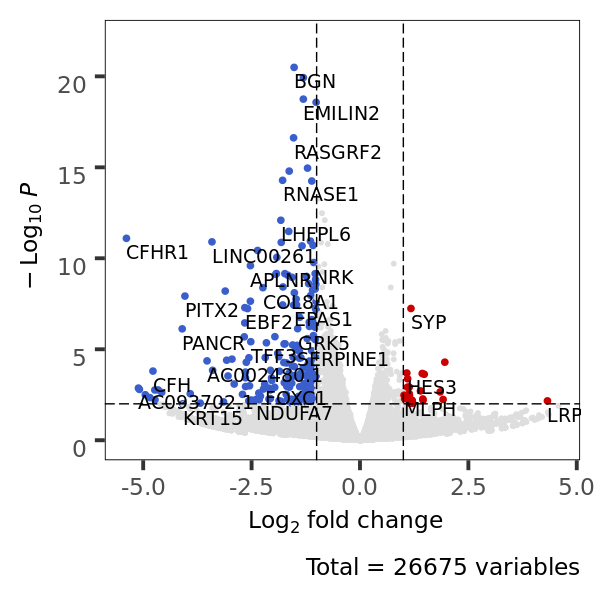

In [71]:
volcano_primed_prc2i

In [121]:
setwd('/lustre1/project/stg_00041/Irene/Human_sequencing/Figures/')

In [122]:
pdf("volcano_P_PI_V2.pdf",width=5,height=5,useDingbats = FALSE)
plot(volcano_primed_prc2i)
dev.off()

png 
  2